<a href="https://colab.research.google.com/github/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./blob/main/Main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocess

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline

In [28]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/ExtendedDataset.csv'

In [8]:
runs = pd.read_csv(dataset_url, sep=';')

In [9]:
runs.head()

,PMMaxWidth,RUNNUMBER,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,Dev1,Dev2,Dev3,Dev4,Dev5,Dev6,Dev7,Dev8,Dev9,Dev10,Avg1,Avg2,Avg3,Avg4,Avg5,Avg6,Avg7,Avg8,Avg9,Avg10,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8,Min9,Min10,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,TotalWastePercent
0,6400,270,5600,700,75,2749.000000,1497.336825,0,18,9,12,9,9,6,6,6,0,NaN,175.733756,86.602540,148.141901,150.00000,150.000000,54.772256,219.089023,0.000000,NaN,NaN,950.000000,1800.000000,2156.250000,3000.000000,3700.000000,3950.000000,4900.000000,5600.000000,NaN,NaN,700.0,1700.0,2050.0,2800.0,3500.0,3900.0,4700.0,5600.0,NaN,NaN,1200.0,1900.0,2400.0,3100.0,3800.0,4000.0,5100.0,5600.0,NaN,0.032345
1,6400,170,5700,600,78,3129.807692,1536.028663,3,9,12,6,9,12,12,3,12,0,0.0,217.944947,178.416329,54.772256,86.60254,86.602540,154.478595,0.000000,261.116484,NaN,600.0,966.666667,1668.750000,2250.000000,3100.000000,3575.000000,4075.000000,5000.000000,5450.000000,NaN,600.0,700.0,1400.0,2200.0,3000.0,3500.0,3900.0,5000.0,5200.0,NaN,600.0,1200.0,1875.0,2300.0,3200.0,3700.0,4300.0,5000.0,5700.0,NaN,0.033967
2,6400,15,5600,600,78,2921.153846,1662.624260,3,18,9,6,9,6,6,12,9,0,0.0,138.266580,180.277564,27.386128,86.60254,219.089023,219.089023,215.322169,132.287566,NaN,600.0,983.333333,1733.333333,2025.000000,3100.000000,3600.000000,4200.000000,4750.000000,5433.333333,NaN,600.0,800.0,1500.0,2000.0,3000.0,3400.0,4000.0,4600.0,5300.0,NaN,600.0,1200.0,1900.0,2050.0,3200.0,3800.0,4400.0,5100.0,5600.0,NaN,0.054585
3,6500,222,6100,600,243,3297.530864,1538.325494,9,21,36,27,33,27,27,30,21,12,0.0,164.316767,143.551882,152.752523,156.66989,179.743407,157.707942,232.156309,134.164079,90.453403,600.0,1100.000000,1766.666667,2355.555556,3027.272727,3600.000000,4277.777778,4870.000000,5500.000000,5950.0,600.0,800.0,1500.0,2100.0,2700.0,3300.0,4000.0,4600.0,5300.0,5900.0,600.0,1300.0,1900.0,2600.0,3200.0,3800.0,4500.0,5200.0,5700.0,6100.0,0.154677
4,6500,437,6000,600,252,3337.797619,1539.162540,3,30,24,30,33,33,30,33,33,3,0.0,208.690498,159.482860,178.082459,156.66989,206.843155,113.714707,187.840600,168.212528,0.000000,600.0,970.000000,1625.000000,2287.500000,2872.727273,3618.181818,4250.000000,4818.181818,5572.727273,6000.0,600.0,700.0,1400.0,2050.0,2700.0,3300.0,4100.0,4600.0,5300.0,6000.0,600.0,1300.0,1900.0,2600.0,3200.0,3900.0,4400.0,5200.0,5800.0,6000.0,0.170383


In [10]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PMMaxWidth         564 non-null    int64  
 1   RUNNUMBER          564 non-null    int64  
 2   MaxWidth           564 non-null    int64  
 3   MinWidth           564 non-null    int64  
 4   NumberOfOrders     564 non-null    int64  
 5   AverageWidth       564 non-null    float64
 6   Deviation          564 non-null    float64
 7   W1                 564 non-null    int64  
 8   W2                 564 non-null    int64  
 9   W3                 564 non-null    int64  
 10  W4                 564 non-null    int64  
 11  W5                 564 non-null    int64  
 12  W6                 564 non-null    int64  
 13  W7                 564 non-null    int64  
 14  W8                 564 non-null    int64  
 15  W9                 564 non-null    int64  
 16  W10                564 non

In [11]:
runs.drop(columns=['RUNNUMBER']).describe()

,PMMaxWidth,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,Dev1,Dev2,Dev3,Dev4,Dev5,Dev6,Dev7,Dev8,Dev9,Dev10,Avg1,Avg2,Avg3,Avg4,Avg5,Avg6,Avg7,Avg8,Avg9,Avg10,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8,Min9,Min10,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,TotalWastePercent
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,564.000000
mean,6401.276596,5974.290780,760.948582,144.074468,3265.561841,1563.085394,2.547872,14.037234,18.632979,21.260638,15.691489,15.457447,15.563830,15.930851,15.430851,9.521277,3.701174,122.747161,164.615549,147.675995,140.690500,136.599989,141.960741,142.926432,142.798100,70.368285,577.977855,975.779921,1627.928223,2201.831566,2882.818327,3528.618459,4158.628941,4810.422375,5440.586058,5957.195945,574.475524,819.921875,1407.200358,2011.432384,2703.136531,3354.327808,3979.962547,4628.947368,5258.627087,5876.400000,581.818182,1127.929688,1830.187835,2412.722420,3058.487085,3697.790055,4342.134831,4992.857143,5620.779221,6037.400000,2.491932
std,64.445729,224.507419,272.497552,75.602340,282.004223,131.999579,3.209031,11.066425,11.667616,11.175548,10.716459,11.004115,10.709029,11.434290,10.137974,7.351701,16.135290,73.245812,71.853059,53.625154,73.338740,70.436740,75.489738,70.759977,71.864696,53.264552,53.892535,112.849807,106.726667,75.572607,111.154398,111.806874,109.988469,108.458587,112.670788,82.554073,60.514500,158.988959,149.231265,84.053098,137.610100,142.249519,137.762877,140.581323,137.876784,112.018464,51.143230,126.449370,116.560668,121.150418,146.782872,141.273518,147.410203,135.246564,148.519789,88.752431,2.100439
min,6300.000000,4000.000000,400.000000,36.000000,2117.187500,870.148499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,700.000000,1300.000000,1962.500000,2600.000000,3200.000000,3800.000000,4500.000000,5100.000000,5700.000000,400.000000,700.000000,1300.000000,1900.000000,2600.000000,3200.000000,3800.000000,4500.000000,5100.000000,5700.000000,400.000000,700.000000,1300.000000,2000.000000,2600.000000,3200.000000,3800.000000,4500.000000,5100.000000,5700.000000,0.032345
25%,6340.000000,6000.000000,600.000000,81.000000,3103.625000,1488.426615,0.000000,6.000000,9.000000,12.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,0.000000,54.772256,140.307733,117.320260,100.000000,100.000000,101.601579,109.544512,103.489122,0.000000,600.000000,900.000000,1566.666667,2156.899351,2810.625000,3460.000000,4100.000000,4740.000000,5366.666667,5900.000000,600.000000,700.000000,1300.000000,1950.000000,2600.000000,3300.000000,3900.000000,4500.000000,5200.000000,5800.000000,600.000000,1100.000000,1800.000000,2300.000000,3000.000000,3600.000000,4300.000000,4900.000000,5500.000000,6000.000000,1.211506
50%,6400.000000,6100.000000,600.000000,126.000000,3278.141026,1575.472321,3.000000,12.000000,18.000000,21.000000,12.000000,12.000000,15.000000,15.000000,15.000000,9.000000,0.000000,145.258670,180.277564,159.404181,154.478595,152.693213,160.242449,161.687529,161.009046,73.854895,600.000000,966.666667,1625.000000,2204.583333,2886.190476,3528.571429,4160.000000,4800.000000,5442.857143,5957.142857,600.000000,800.000000,1300.000000,2000.000000,2700.000000,3300.000000,3900.000000,4600.000000,5200.000000,5900.000000,600.000000,1200.000000,1875.000000,2500.0

In [25]:
def classification_condition(row):
  total_waste_value = row['TotalWastePercent']
  if total_waste_value < 1:
    return 0
  if total_waste_value < 2:
    return 1
  return 2

In [26]:
runs['Class'] = runs.apply (lambda row: classification_condition(row), axis=1)

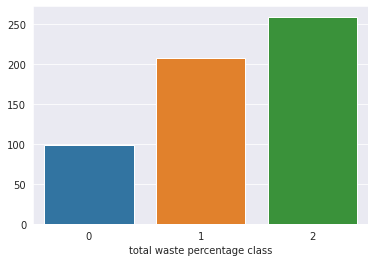

In [29]:
# Checking if Data is balanced
xs = runs['Class'].value_counts().index
ys = runs['Class'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("total waste percentage class")
plt.show()